In [1]:
%matplotlib inline
from textblob import TextBlob, Word
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [2]:
import csv
import pandas as pd
with open('sample_usa.txt', encoding='latin1') as f:
  result = f.readlines()
  result = [line.rstrip('\n') for line in open('sample_usa.txt', encoding='latin1')]
  result
  print(result)

['While I understand and appreciate what the app is trying to do, the app checking my location consistently at 1am, and 3am is crazy! It is not checking my location when I am actually out and about during the day. I will be deleting this as I find that for me, it is worthless. Based on reply..let me correct that to exposure checks at 2+am, 3+am, 4+am, 5+am, do no good for me as thats when I\'m home asleep. Those are the check times that have been reported to me. Bluetooth has always had security issues! Hackers can get into our phones via Bluetooth. Search Google: "Bluetooth Unveils Its Latest Security Issue, With No Security Solution," ... on MSN News/Gizmodo, 9/10/2020. Also, Bluetooth constantly searches, draining batteries. I think it would be safer for the app to keep a record of where we have been for the past couple of weeks, then the VDH could use that to cross-reference to see if any app users were around an app reported Covid-19 victim. Doesn\'t run daily or even weekly check

In [3]:
# Text cleaning 
from string import punctuation
import re

def clean_sentence(sentence):
    sentence = re.sub(r"(?:\@|https?\://)\S+|\n+", "", sentence.lower())
    # Fix spelling errors in comments!
    sent = TextBlob(sentence)
    sent.correct()
    clean = ""
    for sentence in sent.sentences:    
        words = sentence.words
        # Remove punctuations
        words = [''.join(c for c in s if c not in punctuation) for s in words]
        words = [s for s in words if s]
        clean += " ".join(words)
        clean += ". "
    return clean
import csv
import pandas as pd
with open('sample_usa.txt', encoding="latin1") as f:
  result = f.readlines()
  result = [line.rstrip('\n') for line in open('sample_usa.txt', encoding='latin1')]
  result
result = [clean_sentence(x) for x in result]
result
type(result)

list

In [4]:
# Check sentiment polarity of each sentence.
sentiment_scores = list()
i = 0
for sentence in result:
    line = TextBlob(sentence)
    sentiment_scores.append(line.sentiment.polarity)
    if(i <= 10):
        print(sentence + ": POLARITY=" + str(line.sentiment.polarity))
        i += 1

while i understand and appreciate what the app is trying to do the app checking my location consistently at 1am and 3am is crazy. it is not checking my location when i am actually out and about during the day. i will be deleting this as i find that for me it is worthless. based on reply let me correct that to exposure checks at 2am 3am 4am 5am do no good for me as thats when i m home asleep. those are the check times that have been reported to me. bluetooth has always had security issues. hackers can get into our phones via bluetooth. search google bluetooth unveils its latest security issue with no security solution on msn newsgizmodo 9102020. also bluetooth constantly searches draining batteries. i think it would be safer for the app to keep a record of where we have been for the past couple of weeks then the vdh could use that to crossreference to see if any app users were around an app reported covid19 victim. does nt run daily or even weekly checks. have been in contact with the d

C:\Users\Men\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Men\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

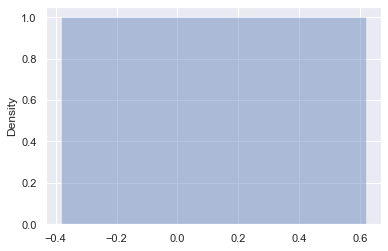

In [5]:
sns.distplot(sentiment_scores)

In [6]:
# Convert array of comments into a single string
comments = TextBlob(' '.join(result))
# Check out noun phrases, will be useful for frequent feature extraction
comments.noun_phrases

WordList(['exposure checks', '2am 3am 4am 5am', 'i m home asleep', 'check times', 'security issues', 'search google bluetooth unveils', 'security issue', 'security solution', 'msn newsgizmodo 9102020.', 'past couple', 'app users', 'covid19 victim', 'nt run', 'weekly checks', 'connection ca nt review', 'nt run', 'pixel 4xl i', 'internal error', 'subsequent retries', 'exposure notifications i', 'error message', 'internal error', 'nt work', 'enable notifications', 'nt work', 'northern virginia', 'virginia beach', 'cell phones', 'american people', 'major election', 'zeka swine flu covid19', 'time i ve', 'i ve', 'positive testers', 'va needs', 'additional work', 'enable notification', 'internal error', 'family member test', 'nt trigger', 'nevada i guess', 'i ll', 'i m', 'battery life', 'government hoax scare covid', 'phones front camera', 'iris scanner', 'dr scare', 'false positives', 'novel family virus', 'cold rino influenza', 'public health major', 'state level', 'app needs', 'national l

In [13]:
import nltk
nltk.download('wordnet')
nltk.download('vader_lexicon')
#compactness pruning:
cleaned = list()
for phrase in comments.noun_phrases:
    count = 0
    for word in phrase.split():
        # Count the number of small words and words without an English definition
        if len(word) <= 2 or (not Word(word).definitions):
            count += 1
    # Only if the 'nonsensical' or short words DO NOT make up more than 40% (arbitrary) of the phrase add
    # it to the cleaned list, effectively pruning the ones not added.
    if count < len(phrase.split())*0.4:
        cleaned.append(phrase)
        
print("After compactness pruning:\nFeature Size:")
len(cleaned)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Men\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Men\AppData\Roaming\nltk_data...


After compactness pruning:
Feature Size:


629

In [14]:
for phrase in cleaned:    
    match = list()
    temp = list()
    word_match = list()
    for word in phrase.split():
        # Find common words among all phrases
        word_match = [p for p in cleaned if re.search(word, p) and p not in word_match]
        # If the size of matched phrases set is smaller than 30% of the cleaned phrases, 
        # then consider the phrase as non-redundant.
        if len(word_match) <= len(cleaned)*0.3 :
            temp.append(word)
            match += word_match
            
    phrase = ' '.join(temp)
#     print("Match for " + phrase + ": " + str(match))

    if len(match) >= len(cleaned)*0.1 :
        # Redundant feature set, since it contains more than 10% of the number of phrases. 
        # Prune all matched features.
        for feature in match:
            if feature in cleaned:
                cleaned.remove(feature)
            
        # Add largest length phrase as feature
        cleaned.append(max(match, key=len))
        

print("After redundancy pruning:\nFeature Size:" + str(len(cleaned)))
print("Cleaned features:")
cleaned


After redundancy pruning:
Feature Size:272
Cleaned features:


['exposure checks',
 'check times',
 'security issues',
 'security issue',
 'security solution',
 'weekly checks',
 'error message',
 'cell phones',
 'american people',
 'major election',
 'nevada i guess',
 'battery life',
 'iris scanner',
 'false positives',
 'novel family virus',
 'cold rino influenza',
 'public health major',
 'full network access',
 'network connections',
 'hijacks aspects',
 'sends information',
 'false positives',
 'peoples phones',
 'complete invasion',
 'false feeling',
 'death rate',
 'positive use',
 'positive reviews',
 'bias vdh employees',
 'ones area',
 'trashy invasion',
 'tax dollars',
 'relative medical information',
 'progressive laws',
 'governor blackface',
 'corrupt ass',
 'morons need',
 'total worthless morons',
 'positive employee',
 'tax dollars',
 'real developer job',
 'political parties',
 'world shame',
 'prison time',
 'timely manner',
 'garbage garbage',
 'exposure checks',
 'check times',
 'error message',
 'false feeling',
 'death rate

In [15]:
from nltk.corpus import stopwords
feature_count = dict()
for phrase in cleaned:
    count = 0
    for word in phrase.split():
        if word not in stopwords.words('english'):
            count += comments.words.count(word)
    
    print(phrase + ": " + str(count))
    feature_count[phrase] = count

exposure checks: 37
check times: 15
security issues: 14
security issue: 18
security solution: 15
weekly checks: 12
error message: 36
cell phones: 33
american people: 70
major election: 10
nevada i guess: 4
battery life: 29
iris scanner: 4
false positives: 10
novel family virus: 33
cold rino influenza: 6
public health major: 28
full network access: 17
network connections: 7
hijacks aspects: 4
sends information: 26
false positives: 10
peoples phones: 26
complete invasion: 7
false feeling: 8
death rate: 4
positive use: 158
positive reviews: 61
bias vdh employees: 20
ones area: 8
trashy invasion: 6
tax dollars: 10
relative medical information: 26
progressive laws: 4
governor blackface: 4
corrupt ass: 4
morons need: 33
total worthless morons: 10
positive employee: 48
tax dollars: 10
real developer job: 24
political parties: 6
world shame: 8
prison time: 22
timely manner: 8
garbage garbage: 8
exposure checks: 37
check times: 15
error message: 36
false feeling: 8
death rate: 4
timely manner: 

In [16]:
# Select frequent feature threshold as (max_count)/100 
# This is an arbitrary decision as of now.
counts = list(feature_count.values())
features = list(feature_count.keys())
threshold = len(comments.noun_phrases)/100
#threshold=66

print("Threshold:" + str(threshold))

frequent_features = list()

for feature, count in feature_count.items():
    if count >= threshold:
        frequent_features.append(feature)
print(' Features:')
frequent_features=frequent_features[0:24]
frequent_features

Threshold:10.51
 Features:


['exposure checks',
 'check times',
 'security issues',
 'security issue',
 'security solution',
 'weekly checks',
 'error message',
 'cell phones',
 'american people',
 'battery life',
 'novel family virus',
 'public health major',
 'full network access',
 'sends information',
 'peoples phones',
 'positive use',
 'positive reviews',
 'bias vdh employees',
 'relative medical information',
 'morons need',
 'positive employee',
 'real developer job',
 'prison time',
 'garbage i hope']

In [17]:
def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score
#b=dataset.values.T.tolist()
#print(b)
nltk_results = [nltk_sentiment(row) for row in frequent_features]
#print(nltk_results)
results_df = pd.DataFrame(nltk_results)
#print(results_df)
text_df = pd.DataFrame(frequent_features)
#print(text_df)
nltk_df = text_df.join(results_df)
#nltk_df1=nltk_df[[0,'neu']]
#print(nltk_df)


In [18]:
nltk_df.head(24)

,0,neg,neu,pos,compound
0,exposure checks,0.000,1.000,0.000,0.0000
1,check times,0.000,1.000,0.000,0.0000
2,security issues,0.000,0.294,0.706,0.3400
3,security issue,0.000,0.294,0.706,0.3400
4,security solution,0.000,0.000,1.000,0.5719
5,weekly checks,0.000,1.000,0.000,0.0000
6,error message,0.730,0.270,0.000,-0.4019
7,cell phones,0.000,1.000,0.000,0.0000
8,american people,0.000,1.000,0.000,0.0000
9,battery life,0.000,1.000,0.000,0.0000


In [19]:
newdf=nltk_df[0]
newdf=pd.DataFrame({'features':nltk_df[0],'pos':nltk_df['pos'],'neg':nltk_df['neg']})
newdf.pos=newdf.pos#+0.2
newdf.neg=newdf.neg#-0.2
newdf

,features,pos,neg
0,exposure checks,0.000,0.000
1,check times,0.000,0.000
2,security issues,0.706,0.000
3,security issue,0.706,0.000
4,security solution,1.000,0.000
5,weekly checks,0.000,0.000
6,error message,0.000,0.730
7,cell phones,0.000,0.000
8,american people,0.000,0.000
9,battery life,0.000,0.000


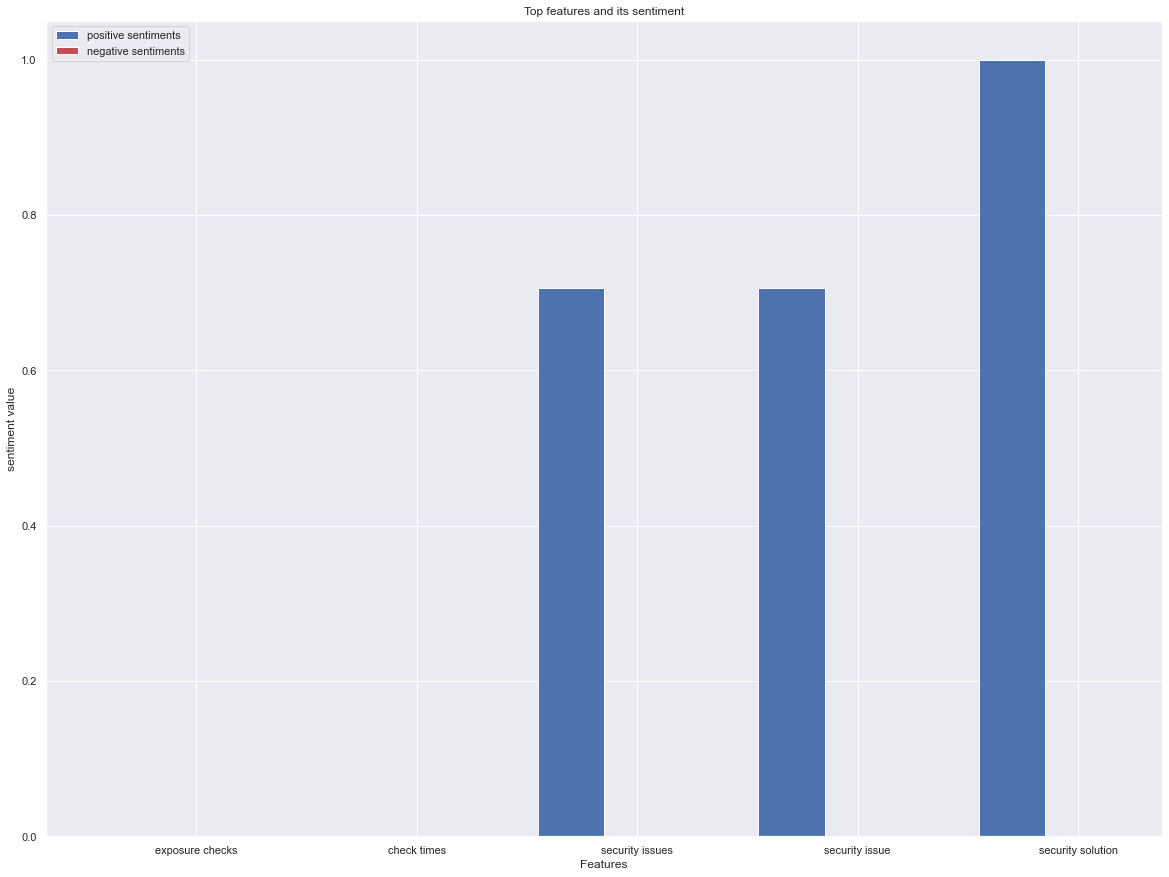

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
newdf

#noun=['positive attitude','good job knowledge','team player','customer acquisition','good visibility','back office process','successful launch','soft skills','suitable candidates','core issues']
#pos_l=[0.71,0.42,0.3,0.2,0.2,0.6,0.2,0.5,0.43,0]
#neg_l=[-0.1,0,-0.300,0,-0.1,0,-0.1,-0.2,0,-0.3]

pos=newdf[0:10]['pos']
neg=newdf[0:10]['neg']

# data to plot
n_groups = 5
positive =newdf['pos'].head(5) 
negative =newdf['neg'].head(5)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 1
 
rects1 = plt.bar(index, positive, bar_width,
alpha=opacity,
color='b',
label='positive sentiments')
 
rects2 = plt.bar(index + bar_width, negative, bar_width,
alpha=opacity,
color='r',
label='negative sentiments')
 
plt.xlabel('Features')
plt.ylabel('sentiment value')
plt.title('Top features and its sentiment')
plt.xticks(index + bar_width, newdf['features'].head(5))
plt.legend()
fig.set_size_inches(20, 15)
plt.show()

In [21]:
absa_list = dict()
print(absa_list)
# For each frequent feature
for f in frequent_features:
    # For each comment
    absa_list[f] = list()
    for comment in result:
        blob = TextBlob(comment)
        # For each sentence of the comment
        for sentence in blob.sentences:
            # Search for frequent feature 'f'
            q = '|'.join(f.split())
            if re.search(r'\w*(' + str(q) + ')\w*', str(sentence)):
                absa_list[f].append(sentence)


print("Aspect Specific sentences:")
absa_list

{}
Aspect Specific sentences:


{'exposure checks': [Sentence("based on reply let me correct that to exposure checks at 2am 3am 4am 5am do no good for me as thats when i m home asleep."),
  Sentence("does nt run daily or even weekly checks."),
  Sentence("when i try to sign up for exposure notifications i keep receiving the following error message internal error please try again."),
  Sentence("it says that s the last time i ve had a check for exposure no notifications ever."),
  Sentence("after having a family member test positive and be quarantined to my house very surprised that neither my wife or i received any notification from app regarding exposure."),
  Sentence("the tracker said there were only 3 checks and they were all from august 6 5 days ago when i downloaded it."),
  Sentence("i just installed and had no exposures how is this possible if my store that is very near me and that i go in almost daily has had two cases recently."),
  Sentence("need a covid exposure app for west virginia what a waste of tax d

In [22]:
scores = list()
absa_scores = dict()
for k, v in absa_list.items():
    absa_scores[k] = list()
    for sent in v:
        score = sent.sentiment.polarity
        scores.append(score)
        absa_scores[k].append(score)

C:\Users\Men\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Men\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Men\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


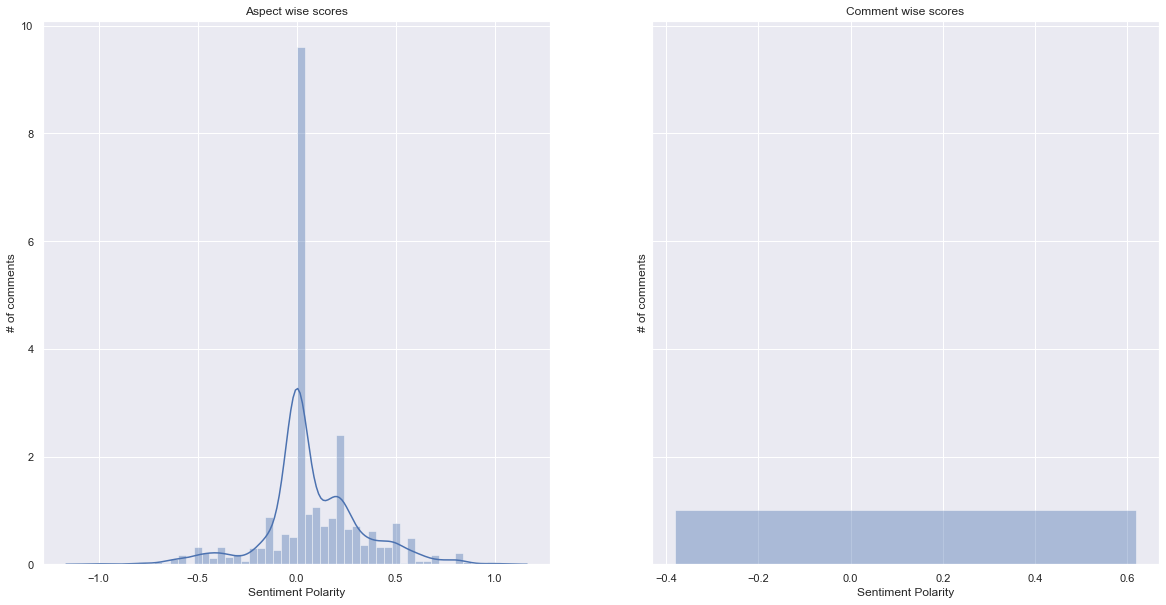

In [23]:
# Now that we have all the scores, let's plot them!
# For comparison, we replot the previous global sentiment polarity plot
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20, 10))
plot1 = sns.distplot(scores, ax=ax1)

ax1.set_title('Aspect wise scores')
ax1.set_xlabel('Sentiment Polarity')
ax1.set_ylabel('# of comments')

ax2.set_title('Comment wise scores')
ax2.set_xlabel('Sentiment Polarity')
ax2.set_ylabel('# of comments')

plot2 = sns.distplot(sentiment_scores, ax=ax2)

In [24]:
# Create data values for stripplot and boxplot
vals = dict()
vals["aspects"] = list()
vals["scores"] = list()
for k, v in absa_scores.items():
    for score in v:
        vals["aspects"].append(k)
        vals["scores"].append(score)

<AxesSubplot:>

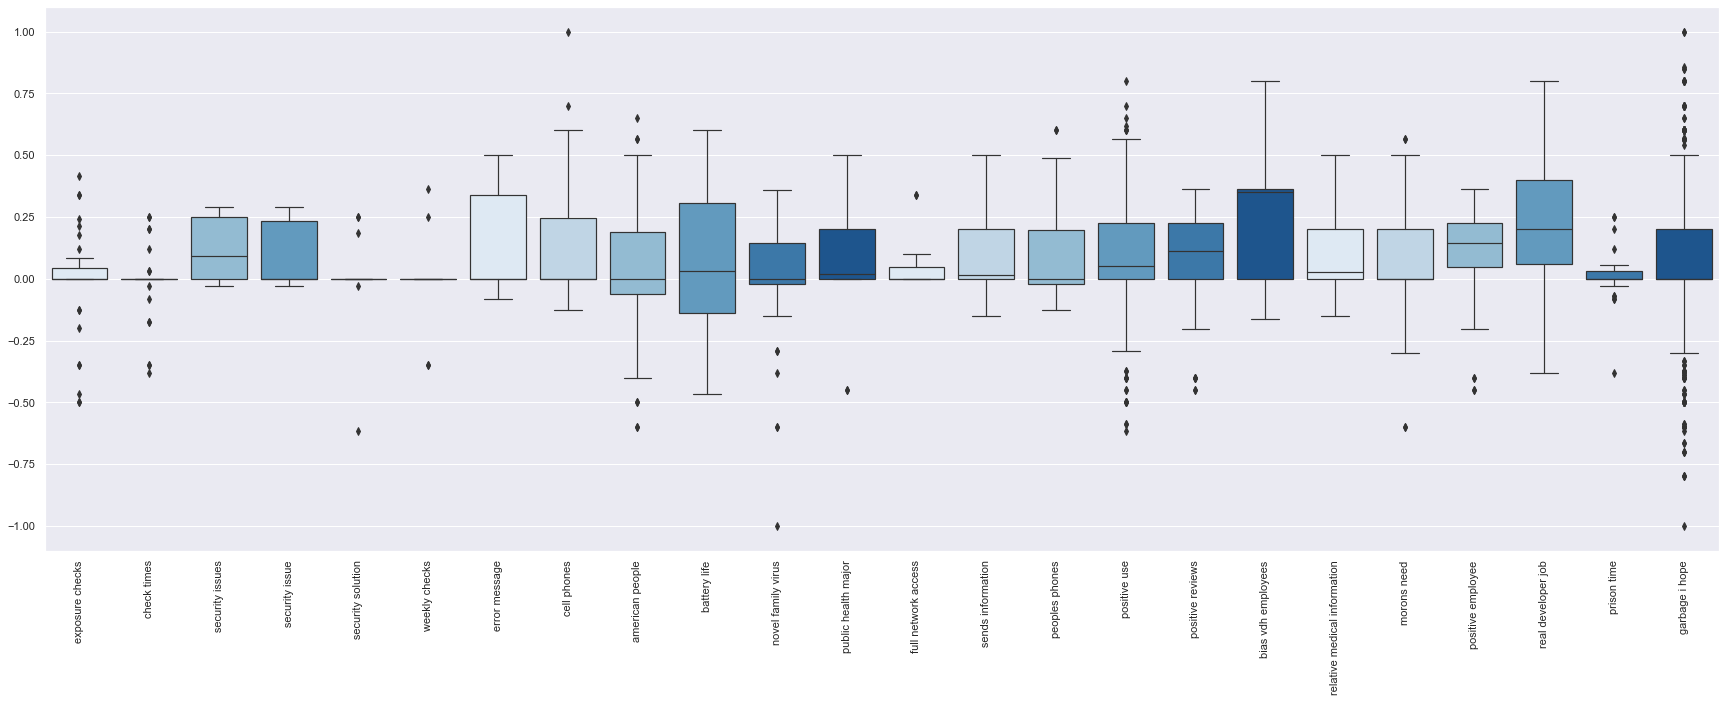

In [25]:
fig, ax1 = plt.subplots(figsize=(30, 10))

color = sns.color_palette("Blues", 6)
plt.xticks(rotation=90)
sns.set_context("paper", font_scale=3) 
sns.boxplot(x="aspects", y="scores", data=vals, palette=color, ax=ax1)

<AxesSubplot:>

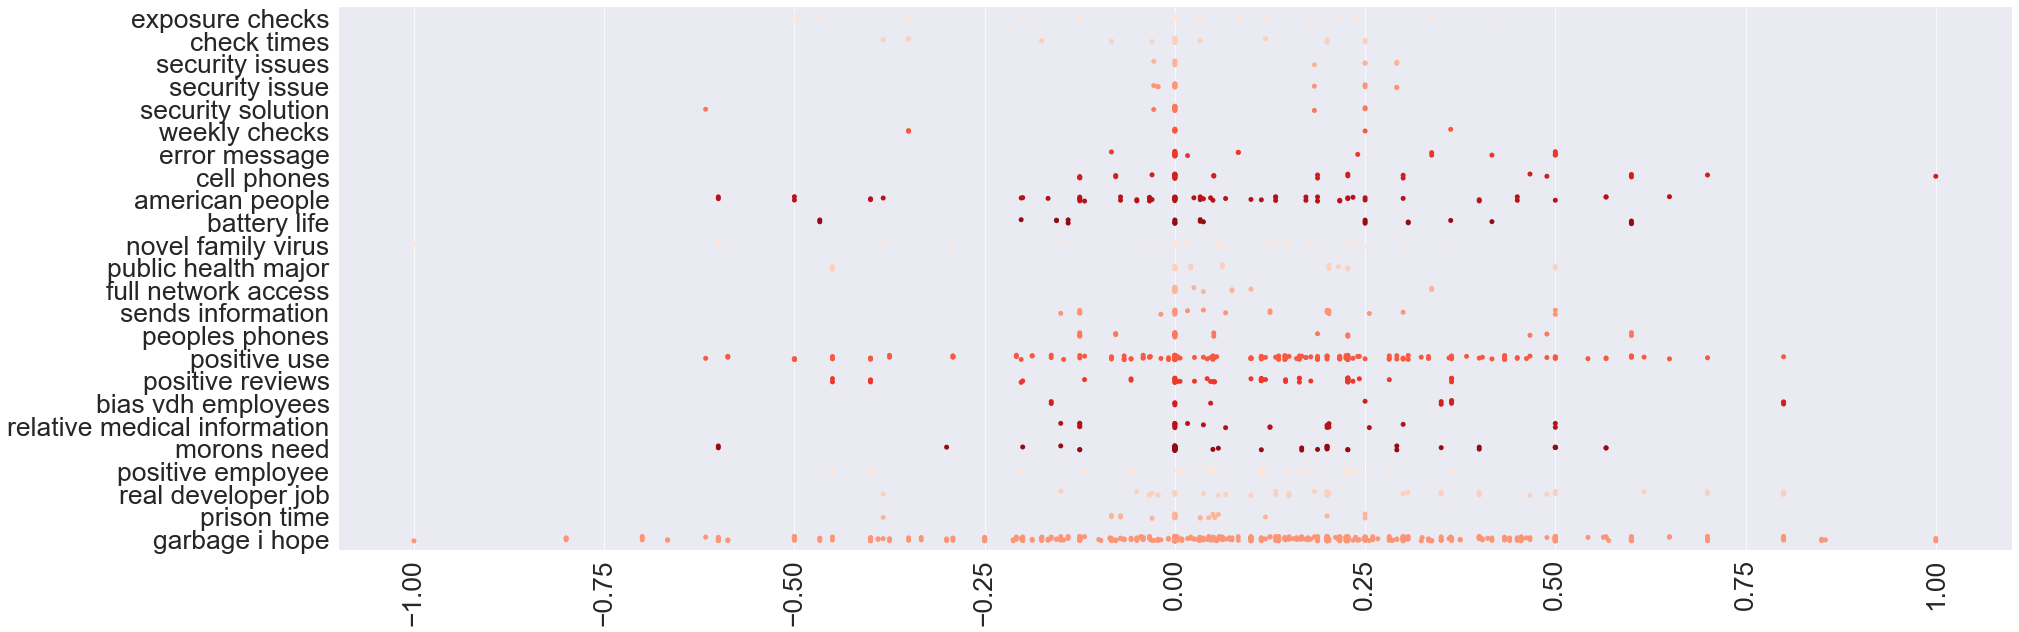

In [26]:
color = sns.color_palette("Reds", 10)
fig, ax1 = plt.subplots(figsize=(30, 10))
plt.xticks(rotation=90)
sns.set_context("paper", font_scale=5) 
sns.stripplot(y="aspects", x="scores",data=vals, palette=color)